In [1]:
import numpy as np
import pandas as pd

In [ ]:
inventory = pd.read_csv("../data/preprocessed/inventory.csv")
sales = pd.read_csv("../data/preprocessed/sales_fifo.csv")
purchases_prices = pd.read_csv("../data/preprocessed/purchase_prices.csv")
inventory_month = pd.read_csv("../data/eom_inventory_data.csv")
purchases_vendor = pd.read_csv("../data/preprocessed/purchases_vendor.csv")


In [3]:
import platform
import matplotlib.pyplot as plt

try:
    system_name = platform.system()
    
    if system_name == 'Darwin':  # macOS
        plt.rcParams['font.family'] = 'AppleGothic'
    elif system_name == 'Windows':  # Windows
        plt.rcParams['font.family'] = 'Malgun Gothic'
    else:  # Linux (예: Ubuntu, Colab)
        plt.rcParams['font.family'] = 'NanumGothic'  # or 'DejaVu Sans'
    
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}")
    print("그래프의 한글이 깨질 수 있습니다.")

In [4]:
sales['store_id'] = sales['inventory_id'].str.split('_').str[0]
sales['brand_id'] = sales['inventory_id'].str.split('_').str[-1]


# ---- 3️⃣ store_id별, month별 GM 합계 ----
store_month_gm = (
    sales.groupby(['store_id', 'month'])['gross_profit']
    .sum()
    .reset_index()
)

# ---- 4️⃣ 피벗 테이블 (store_id x month) ----
store_month_gm_pivot = store_month_gm.pivot(index='store_id', columns='month', values='gross_profit')

print("💰 store_id별 월별 매출 총이익 (GM)")
display(store_month_gm_pivot.head())

💰 store_id별 월별 매출 총이익 (GM)


month,1,2,3,4,5,6,7,8,9,10,11,12
store_id,,,,,,,,,,,,
1,143613.916910,131836.001721,155627.727366,133296.459866,143194.317853,149104.659420,145770.372134,136825.748499,158448.334312,137547.077045,143603.335144,200328.949359
10,154040.546707,148875.501690,149771.009676,143016.635564,169180.880177,157159.678589,189448.506741,149136.968077,158152.210660,160317.794721,202708.339852,230344.035967
11,132396.436333,109460.282140,108767.621723,119209.793315,128323.248105,134548.228847,130316.274490,117639.966495,134273.646136,129224.006409,130711.316202,165455.768340
12,49478.892932,45751.138007,45525.896857,49862.979898,68567.943944,90713.467671,136053.206755,111739.750372,93890.795423,65645.405812,54368.645521,63095.384698
13,43014.266492,41534.650127,45040.337171,45270.111412,50102.709578,42243.806349,46625.197120,43561.949474,50524.159876,45493.506530,44616.459313,66961.227815


In [5]:
# store_id별, month별 재고 합계
inv_monthly = inventory_month
inv_monthly = (
    inventory_month.groupby(["store_id", "month"])
    .agg({
        "EOM_Inventory_Quantity": "sum",
        "EOM_Inventory_Value": "sum"
    })
    .reset_index()
)

# 월별로 피벗 → 각 매장의 월별 재고 추이 비교용
inv_monthly_pivot_qty = inv_monthly.pivot(index="store_id", columns="month", values="EOM_Inventory_Quantity")
inv_monthly_pivot_val = inv_monthly.pivot(index="store_id", columns="month", values="EOM_Inventory_Value")

print("📦 월별 재고량 합계 (store_id x month)")
display(inv_monthly_pivot_qty.head())

print("💰 월별 재고금액 합계 (store_id x month)")
display(inv_monthly_pivot_val.head())


📦 월별 재고량 합계 (store_id x month)


month,1,2,3,4,5,6,7,8,9,10,11,12
store_id,,,,,,,,,,,,
1,68156.0,69170.0,64300.0,67986.0,69180.0,66914.0,64853.0,64055.0,67455.0,67380.0,65756.0,69291.0
2,48789.0,49984.0,52033.0,48106.0,46490.0,49010.0,49478.0,45139.0,50964.0,51753.0,48164.0,49449.0
3,8326.0,8122.0,8569.0,7735.0,8155.0,7840.0,7790.0,7952.0,7725.0,8356.0,8203.0,7892.0
4,53475.0,52061.0,52257.0,48086.0,54193.0,53849.0,54909.0,54257.0,51376.0,51152.0,60113.0,52459.0
5,20503.0,20008.0,18302.0,19221.0,18574.0,17169.0,19093.0,18666.0,20480.0,20450.0,20334.0,19609.0


💰 월별 재고금액 합계 (store_id x month)


month,1,2,3,4,5,6,7,8,9,10,11,12
store_id,,,,,,,,,,,,
1,744047.08,739267.29,684380.96,723279.48,742045.34,726757.95,705772.01,678060.40,708364.43,734082.60,718717.66,729929.47
2,548501.27,541261.97,562350.90,528871.76,510506.02,527392.73,545767.05,487096.15,541303.68,576053.62,524789.25,527358.52
3,90125.23,96158.32,95607.48,86837.12,89284.47,88003.48,86106.23,88216.56,84192.04,88242.02,85751.48,84427.20
4,523298.89,517922.83,508513.04,466552.90,541322.21,547971.43,555111.77,559852.74,522317.93,523434.08,627454.06,532212.79
5,171683.58,170320.57,155983.64,166472.35,158780.20,152024.05,162515.05,154704.41,171206.00,173718.83,169103.86,162892.04


In [6]:
sales

,inventory_id,sales_quantity,sales_dollars,sales_price,sales_date,excise_tax,vendor_id,month,dayofweek,volume,...,fifo_purchase_cost,fifo_purchase_order_date,fifo_receiving_date,fifo_invoice_date,is_shortage,fifo_is_opening,gross_profit,gross_margin_rate,store_id,brand_id
0,1_SPARROW_1004,1,16.49,16.49,2024-01-01,0.79,12546,1,0,750.0,...,10.650000,NaN,NaN,NaN,False,True,5.050000,0.306246,1,1004
1,1_SPARROW_1004,2,32.98,16.49,2024-01-02,1.57,12546,1,1,750.0,...,10.650000,NaN,NaN,NaN,False,True,10.110000,0.306549,1,1004
2,1_SPARROW_1004,1,16.49,16.49,2024-01-03,0.79,12546,1,2,750.0,...,10.650000,NaN,NaN,NaN,False,True,5.050000,0.306246,1,1004
3,1_SPARROW_1004,1,14.49,14.49,2024-01-08,0.79,12546,1,0,750.0,...,10.650000,NaN,NaN,NaN,False,True,3.050000,0.210490,1,1004
4,1_SPARROW_1005,2,69.98,34.99,2024-01-09,0.79,12546,1,1,750.0,...,27.340000,NaN,NaN,NaN,False,True,14.510000,0.207345,1,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825358,9_BLUEBIRD_984,1,25.99,25.99,2024-12-17,0.79,9165,12,1,750.0,...,20.630039,2024-10-19,2024-10-26,2024-11-08,False,False,4.569961,0.175835,9,984
12825359,9_BLUEBIRD_984,1,25.99,25.99,2024-12-21,0.79,9165,12,5,750.0,...,20.630265,2024-11-29,2024-12-07,2024-12-18,False,False,4.569735,0.175827,9,984
12825360,9_BLUEBIRD_984,3,77.97,25.99,2024-12-23,2.36,9165,12,0,750.0,...,20.630265,2024-11-29,2024-12-07,2024-12-18,False,False,13.719204,0.175955,9,984
12825361,9_BLUEBIRD_984,1,25.99,25.99,2024-12-24,0.79,9165,12,1,750.0,...,20.630265,2024-11-29,2024-12-07,2024-12-18,False,False,4.569735,0.175827,9,984


In [7]:
sales['store_id'] = sales['store_id'].astype(int)
sales['brand_id'] = sales['brand_id'].astype(int)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825363 entries, 0 to 12825362
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   inventory_id              object 
 1   sales_quantity            int64  
 2   sales_dollars             float64
 3   sales_price               float64
 4   sales_date                object 
 5   excise_tax                float64
 6   vendor_id                 int64  
 7   month                     int64  
 8   dayofweek                 int64  
 9   volume                    float64
 10  purchase_price            float64
 11  retail_price              float64
 12  fifo_purchase_cost        float64
 13  fifo_purchase_order_date  object 
 14  fifo_receiving_date       object 
 15  fifo_invoice_date         object 
 16  is_shortage               bool   
 17  fifo_is_opening           bool   
 18  gross_profit              float64
 19  gross_margin_rate         float64
 20  store_id              

In [8]:
import pandas as pd

# sales 데이터 예시
sales_df = sales.copy()

# 1️⃣ 브랜드별 총 집계
brand_grouped = sales_df.groupby('brand_id').agg(
    total_sales=('sales_quantity','sum'),
    total_dollars=('sales_dollars','sum'),
    total_gm=('gross_profit','sum'),
    avg_price=('sales_price','mean')
).reset_index()

# 2️⃣ 매출총이익률 계산
brand_grouped['gm_margin'] = brand_grouped['total_gm'] / brand_grouped['total_dollars']

# 3️⃣ 월별 판매량 표준편차 계산
monthly_sales = sales_df.groupby(['brand_id','month'])['sales_quantity'].sum().unstack(fill_value=0)
monthly_std = monthly_sales.std(axis=1).reset_index().rename(columns={0:'month_std'})

# 4️⃣ merge
brand_grouped = brand_grouped.merge(monthly_std, on='brand_id', how='left')

# 5️⃣ 군집화용 데이터프레임
cluster_df = brand_grouped[['brand_id','avg_price','total_sales','gm_margin','month_std']]
cluster_df

,brand_id,avg_price,total_sales,gm_margin,month_std
0,58,12.587496,3446,0.196739,55.842039
1,60,10.500284,1775,0.222675,240.608115
2,61,13.990000,312,0.184180,6.928203
3,62,38.379953,3125,0.230672,95.881990
4,63,40.435205,2778,0.225445,79.569866
...,...,...,...,...,...
11232,90089,119.990000,159,0.348099,10.938880
11233,90090,649.990000,15,0.310115,1.484771
11234,90604,119.990000,76,0.341959,10.030257
11235,90609,24.990000,83,0.315614,5.728054


In [9]:
# inventory_month 예시: store_id, brand_id, month, EOM_Inventory_Quantity
# brand_id 기준으로 통합
brand_monthly = inventory_month.groupby(['brand_id','month'])['EOM_Inventory_Quantity'].sum().reset_index()

# pivot: brand_id x month
brand_monthly_pivot = brand_monthly.pivot(index='brand_id', columns='month', values='EOM_Inventory_Quantity').fillna(0)

# 월별 재고량 변동성 계산 (표준편차)
brand_monthly_pivot['inv_std'] = brand_monthly_pivot.std(axis=1)
brand_monthly_pivot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,inv_std
brand_id,,,,,,,,,,,,,
58,293.0,293.0,336.0,318.0,316.0,344.0,307.0,308.0,321.0,304.0,360.0,328.0,20.297783
60,168.0,87.0,68.0,49.0,36.0,31.0,28.0,28.0,30.0,898.0,463.0,121.0,260.643653
61,24.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,5.116817
62,439.0,421.0,443.0,407.0,421.0,466.0,448.0,548.0,516.0,524.0,522.0,452.0,47.686714
63,411.0,369.0,375.0,316.0,412.0,396.0,391.0,440.0,455.0,430.0,433.0,417.0,37.825256


In [10]:
# 6️⃣ cluster_df에 inv_std 병합
cluster_df = cluster_df.merge(
    brand_monthly_pivot['inv_std'].reset_index(),
    on='brand_id',
    how='left'
)

# 결측치 처리
cluster_df['inv_std'] = cluster_df['inv_std'].fillna(0)

# 7️⃣ 최종 군집화용 데이터 확인
cluster_df.head()

,brand_id,avg_price,total_sales,gm_margin,month_std,inv_std
0,58,12.587496,3446,0.196739,55.842039,20.297783
1,60,10.500284,1775,0.222675,240.608115,260.643653
2,61,13.990000,312,0.184180,6.928203,5.116817
3,62,38.379953,3125,0.230672,95.881990,47.686714
4,63,40.435205,2778,0.225445,79.569866,37.825256


⚠ DBSCAN: 유효 군집이 2개 미만이라 실루엣 계산 불가
cluster_dbscan_log
 0    11188
-1       49
Name: count, dtype: int64


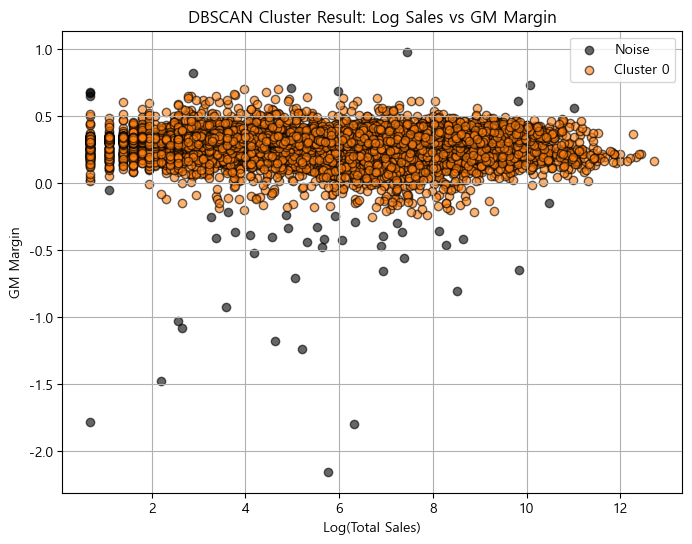

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# 1️⃣ 군집화용 데이터 선택
cluster_df['log_sales'] = np.log1p(cluster_df['total_sales'])  # 로그 판매량 추가
X_scaled = StandardScaler().fit_transform(cluster_df[['log_sales', 'gm_margin']])

# 2️⃣ DBSCAN 모델 생성
# eps, min_samples는 데이터 분포에 맞게 조정 가능
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
labels_dbscan = dbscan.fit_predict(X_scaled)

# 3️⃣ 결과를 데이터프레임에 추가
cluster_df['cluster_dbscan_log'] = labels_dbscan

# 4️⃣ 실루엣 점수 확인 (노이즈 제외)
mask = labels_dbscan != -1
if len(np.unique(labels_dbscan[mask])) > 1:
    sil_score = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    print(f"✅ DBSCAN (Log Sales) 실루엣 계수 (노이즈 제외): {sil_score:.4f}")
else:
    print("⚠ DBSCAN: 유효 군집이 2개 미만이라 실루엣 계산 불가")

# 5️⃣ 군집 분포 확인
print(cluster_df['cluster_dbscan_log'].value_counts())

# 6️⃣ 시각화
plt.figure(figsize=(8,6))
unique_labels = np.unique(labels_dbscan)
colors = plt.cm.tab10(range(len(unique_labels)))

for i, label in enumerate(unique_labels):
    mask = labels_dbscan == label
    color = 'k' if label == -1 else colors[i]
    label_name = 'Noise' if label == -1 else f'Cluster {label}'
    plt.scatter(
        cluster_df.loc[mask, 'log_sales'],
        cluster_df.loc[mask, 'gm_margin'],
        c=[color],
        label=label_name,
        alpha=0.6,
        edgecolor='k'
    )

plt.xlabel('Log(Total Sales)')
plt.ylabel('GM Margin')
plt.title('DBSCAN Cluster Result: Log Sales vs GM Margin')
plt.legend()
plt.grid(True)
plt.show()


* 판매량이 매우 적거나 GM 비율이 극단적이거나 판매량과 GM 비율 조합이 다른 브랜드와 멀리 떨어져 있음 -> 소량 판매 브랜드, 신제품, 단종 브랜드
* 핵심 매출 브랜드

✅ KMeans (Log Sales) 실루엣 계수: 0.4194
cluster_kmeans_log
0    5881
1    5356
Name: count, dtype: int64
                    log_sales  gm_margin
cluster_kmeans_log                      
0                    3.369158   0.314993
1                    7.643899   0.265550


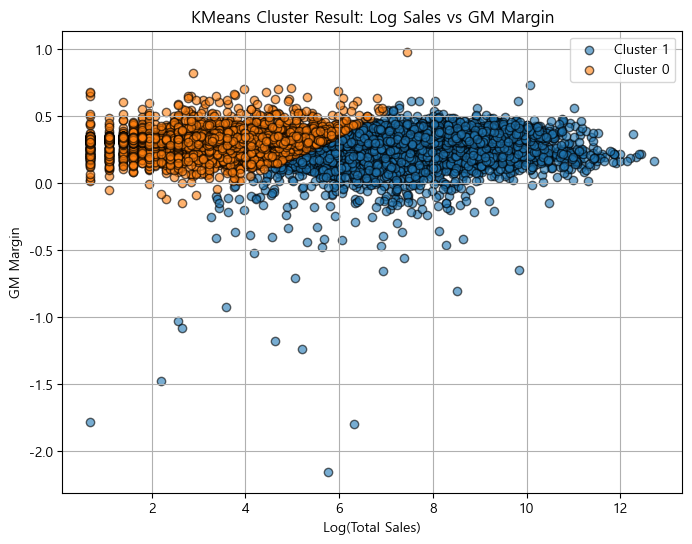

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1️⃣ 군집화용 데이터 선택
X = cluster_df[['total_sales', 'gm_margin']].copy()

# 2️⃣ 판매량 로그 변환
cluster_df['log_sales'] = np.log1p(cluster_df['total_sales'])  # cluster_df에 직접 추가
X_scaled = StandardScaler().fit_transform(cluster_df[['log_sales', 'gm_margin']])

# 3️⃣ KMeans 모델 생성 (군집 2개)
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# 4️⃣ 군집 결과 데이터프레임에 추가
cluster_df['cluster_kmeans_log'] = labels_kmeans

# 5️⃣ 실루엣 점수 확인
sil_score = silhouette_score(X_scaled, labels_kmeans)
print(f"✅ KMeans (Log Sales) 실루엣 계수: {sil_score:.4f}")

# 6️⃣ 군집 분포 확인
print(cluster_df['cluster_kmeans_log'].value_counts())

# 7️⃣ 군집별 평균 확인
cluster_summary = cluster_df.groupby('cluster_kmeans_log')[['log_sales','gm_margin']].mean()
print(cluster_summary)

# 8️⃣ 시각화
plt.figure(figsize=(8,6))
unique_labels = cluster_df['cluster_kmeans_log'].unique()
colors = plt.cm.tab10(range(len(unique_labels)))

for i, label in enumerate(unique_labels):
    mask = cluster_df['cluster_kmeans_log'] == label
    plt.scatter(
        cluster_df.loc[mask, 'log_sales'],
        cluster_df.loc[mask, 'gm_margin'],
        c=[colors[i]],
        label=f'Cluster {label}',
        alpha=0.6,
        edgecolor='k'
    )

plt.xlabel('Log(Total Sales)')
plt.ylabel('GM Margin')
plt.title('KMeans Cluster Result: Log Sales vs GM Margin')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
cluster_df

,brand_id,avg_price,total_sales,gm_margin,month_std,inv_std,log_sales,cluster_dbscan_log,cluster_kmeans_log
0,58,12.587496,3446,0.196739,55.842039,20.297783,8.145260,0,1
1,60,10.500284,1775,0.222675,240.608115,260.643653,7.482119,0,1
2,61,13.990000,312,0.184180,6.928203,5.116817,5.746203,0,1
3,62,38.379953,3125,0.230672,95.881990,47.686714,8.047510,0,1
4,63,40.435205,2778,0.225445,79.569866,37.825256,7.929846,0,1
...,...,...,...,...,...,...,...,...,...
11232,90089,119.990000,159,0.348099,10.938880,38.796673,5.075174,0,0
11233,90090,649.990000,15,0.310115,1.484771,4.420167,2.772589,0,0
11234,90604,119.990000,76,0.341959,10.030257,0.000000,4.343805,0,0
11235,90609,24.990000,83,0.315614,5.728054,0.000000,4.430817,0,0


In [14]:
# 1️⃣ 매출액 계산 (이미 계산된 total_revenue도 활용 가능)
cluster_df['total_revenue'] = cluster_df['avg_price'] * cluster_df['total_sales']

# 2️⃣ cluster_dbscan_log 기준 군집별 요약 통계
cluster_summary_log = cluster_df.groupby('cluster_dbscan_log').agg(
    avg_price_mean=('avg_price','mean'),
    month_std_mean=('month_std','mean'),
    inv_std_mean=('inv_std','mean'),
    gm_margin_mean=('gm_margin','mean'),
    total_sales_sum=('total_sales','sum'),
    total_revenue_sum=('total_revenue','sum'),
    brand_count=('brand_id','nunique')
).reset_index()

# 3️⃣ 전체 대비 매출 비중 계산 (매출액 기준)
total_revenue_all = cluster_summary_log['total_revenue_sum'].sum()
cluster_summary_log['sales_ratio(%)'] = (cluster_summary_log['total_revenue_sum'] / total_revenue_all * 100).round(2)

# 4️⃣ 보기 좋게 매출 비중 기준 정렬
cluster_summary_log = cluster_summary_log.sort_values('sales_ratio(%)', ascending=False)

cluster_summary_log

,cluster_dbscan_log,avg_price_mean,month_std_mean,inv_std_mean,gm_margin_mean,total_sales_sum,total_revenue_sum,brand_count,sales_ratio(%)
1,0,34.903902,115.311188,76.210407,0.294277,32729438,4.556710e+08,11188,99.86
0,-1,14.506040,230.011858,83.862112,-0.359517,188438,6.287428e+05,49,0.14


### 2단계

In [15]:
# inventory_month 예시: store_id, brand_id, month, EOM_Inventory_Quantity
# brand_id 기준으로 통합
brand_monthly = inventory_month.groupby(['brand_id','month'])['EOM_Inventory_Quantity'].sum().reset_index()

# pivot: brand_id x month
brand_monthly_pivot = brand_monthly.pivot(index='brand_id', columns='month', values='EOM_Inventory_Quantity').fillna(0)

# 월별 재고량 변동성 계산 (표준편차)
brand_monthly_pivot['inv_std'] = brand_monthly_pivot.std(axis=1)
brand_monthly_pivot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,inv_std
brand_id,,,,,,,,,,,,,
58,293.0,293.0,336.0,318.0,316.0,344.0,307.0,308.0,321.0,304.0,360.0,328.0,20.297783
60,168.0,87.0,68.0,49.0,36.0,31.0,28.0,28.0,30.0,898.0,463.0,121.0,260.643653
61,24.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,5.116817
62,439.0,421.0,443.0,407.0,421.0,466.0,448.0,548.0,516.0,524.0,522.0,452.0,47.686714
63,411.0,369.0,375.0,316.0,412.0,396.0,391.0,440.0,455.0,430.0,433.0,417.0,37.825256


In [16]:
# 1단계 cluster 0 브랜드만 선택 (예시)
cluster0_df = cluster_df[cluster_df['cluster_dbscan_log'] == 0].copy()

# 군집화용 데이터 확인
X_step2 = cluster0_df[['avg_price','month_std','inv_std']]
X_step2.head()

,avg_price,month_std,inv_std
0,12.587496,55.842039,20.297783
1,10.500284,240.608115,260.643653
2,13.990000,6.928203,5.116817
3,38.379953,95.881990,47.686714
4,40.435205,79.569866,37.825256


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_step2)

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# 최적 k = 4
k_opt = 3
kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# 실루엣 계수 계산
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"✅ 실루엣 계수 (Silhouette Score): {sil_score:.4f}")

✅ 실루엣 계수 (Silhouette Score): 0.8630


In [19]:
# 결과를 데이터프레임에 추가
cluster0_df['kmeans_cluster'] = cluster_labels

# 군집별 평균 확인
cluster0_df.groupby('kmeans_cluster')[['avg_price','month_std','inv_std']].mean()

# 군집별 평균 + 개수 확인
cluster_summary = cluster0_df.groupby('kmeans_cluster').agg(
    avg_price_mean=('avg_price','mean'),
    month_std_mean=('month_std','mean'),
    inv_std_mean=('inv_std','mean'),
    count=('brand_id','count')  # 브랜드 개수
).reset_index()

cluster_summary

,kmeans_cluster,avg_price_mean,month_std_mean,inv_std_mean,count
0,0,32.233418,64.888437,42.455645,10775
1,1,12.813964,1469.956227,983.019237,402
2,2,3458.050606,0.568787,0.793920,11


In [20]:
cluster0_df['total_dollars'] = cluster0_df['avg_price'] * cluster0_df['total_sales']

# 군집별 총 매출
cluster_sales = cluster0_df.groupby('kmeans_cluster')['total_dollars'].sum().reset_index()
cluster_sales.rename(columns={'total_dollars':'cluster_total_dollars'}, inplace=True)

# 전체 매출
total_dollars_all = cluster0_df['total_dollars'].sum()

# 비중 계산
cluster_sales['sales_ratio'] = cluster_sales['cluster_total_dollars'] / total_dollars_all * 100

# 출력
cluster_sales


,kmeans_cluster,cluster_total_dollars,sales_ratio
0,0,2.708879e+08,59.448129
1,1,1.846191e+08,40.515868
2,2,1.640541e+05,0.036003


In [21]:
# 1️⃣ cluster_df의 군집별 brand_id 목록
cluster_df_groups = (
    cluster_df.groupby('cluster_dbscan_log')['brand_id']
    .apply(list)
    .reset_index()
    .rename(columns={'brand_id': 'brand_id_list'})
)

# 2️⃣ cluster0_df의 군집별 brand_id 목록
cluster0_df_groups = (
    cluster0_df.groupby('kmeans_cluster')['brand_id']
    .apply(list)
    .reset_index()
    .rename(columns={'brand_id': 'brand_id_list'})
)

# 3️⃣ 각 군집별 브랜드 개수 추가
cluster_df_groups['brand_count'] = cluster_df_groups['brand_id_list'].apply(len)
cluster0_df_groups['brand_count'] = cluster0_df_groups['brand_id_list'].apply(len)

# 4️⃣ 결과 확인
print("📊 DBSCAN 군집별 brand_id 리스트")
display(cluster_df_groups)

print("\n📊 KMeans 군집별 brand_id 리스트")
display(cluster0_df_groups)

📊 DBSCAN 군집별 brand_id 리스트


,cluster_dbscan_log,brand_id_list,brand_count
0,-1,"[749, 814, 1297, 1771, 2150, 2166, 2277, 3508,...",49
1,0,"[58, 60, 61, 62, 63, 70, 72, 75, 77, 79, 82, 8...",11188



📊 KMeans 군집별 brand_id 리스트


,kmeans_cluster,brand_id_list,brand_count
0,0,"[58, 60, 61, 62, 63, 70, 72, 75, 77, 79, 82, 8...",10775
1,1,"[126, 273, 381, 508, 540, 811, 1001, 1003, 106...",402
2,2,"[423, 500, 1176, 1251, 1300, 1991, 2367, 4109,...",11


In [22]:
# df_copy_test DataFrame에서 cluster_label_step2 값이 2인 행 선택
clusterABC_df = cluster0_df_groups[cluster0_df_groups['kmeans_cluster'] == 0]

# 선택된 행들에서 'brand_id_list' 컬럼 값만 추출
cluster0_brand_ids = clusterABC_df['brand_id_list']
cluster0_brand_ids

0    [58, 60, 61, 62, 63, 70, 72, 75, 77, 79, 82, 8...
Name: brand_id_list, dtype: object

In [28]:
sales

,inventory_id,sales_quantity,sales_dollars,sales_price,sales_date,excise_tax,vendor_id,month,dayofweek,volume,...,fifo_purchase_cost,fifo_purchase_order_date,fifo_receiving_date,fifo_invoice_date,is_shortage,fifo_is_opening,gross_profit,gross_margin_rate,store_id,brand_id
0,1_SPARROW_1004,1,16.49,16.49,2024-01-01,0.79,12546,1,0,750.0,...,10.650000,NaN,NaN,NaN,False,True,5.050000,0.306246,1,1004
1,1_SPARROW_1004,2,32.98,16.49,2024-01-02,1.57,12546,1,1,750.0,...,10.650000,NaN,NaN,NaN,False,True,10.110000,0.306549,1,1004
2,1_SPARROW_1004,1,16.49,16.49,2024-01-03,0.79,12546,1,2,750.0,...,10.650000,NaN,NaN,NaN,False,True,5.050000,0.306246,1,1004
3,1_SPARROW_1004,1,14.49,14.49,2024-01-08,0.79,12546,1,0,750.0,...,10.650000,NaN,NaN,NaN,False,True,3.050000,0.210490,1,1004
4,1_SPARROW_1005,2,69.98,34.99,2024-01-09,0.79,12546,1,1,750.0,...,27.340000,NaN,NaN,NaN,False,True,14.510000,0.207345,1,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825358,9_BLUEBIRD_984,1,25.99,25.99,2024-12-17,0.79,9165,12,1,750.0,...,20.630039,2024-10-19,2024-10-26,2024-11-08,False,False,4.569961,0.175835,9,984
12825359,9_BLUEBIRD_984,1,25.99,25.99,2024-12-21,0.79,9165,12,5,750.0,...,20.630265,2024-11-29,2024-12-07,2024-12-18,False,False,4.569735,0.175827,9,984
12825360,9_BLUEBIRD_984,3,77.97,25.99,2024-12-23,2.36,9165,12,0,750.0,...,20.630265,2024-11-29,2024-12-07,2024-12-18,False,False,13.719204,0.175955,9,984
12825361,9_BLUEBIRD_984,1,25.99,25.99,2024-12-24,0.79,9165,12,1,750.0,...,20.630265,2024-11-29,2024-12-07,2024-12-18,False,False,4.569735,0.175827,9,984


In [29]:
# cluster0_brand_ids Series에서 리스트 꺼내기
brand_id_list = cluster0_brand_ids.iloc[0]  # 0번째 행의 리스트

# inventory_id에서 brand_id 추출
sales['brand_id'] = sales['inventory_id'].apply(lambda x: int(x.split('_')[-1]))

# brand_id_list에 있는 행만 필터링
cluster0_sales = sales[sales['brand_id'].isin(brand_id_list)].copy()

In [30]:
cluster0_sales

,inventory_id,sales_quantity,sales_dollars,sales_price,sales_date,excise_tax,vendor_id,month,dayofweek,volume,...,fifo_purchase_cost,fifo_purchase_order_date,fifo_receiving_date,fifo_invoice_date,is_shortage,fifo_is_opening,gross_profit,gross_margin_rate,store_id,brand_id
0,1_SPARROW_1004,1,16.49,16.49,2024-01-01,0.79,12546,1,0,750.0,...,10.650000,NaN,NaN,NaN,False,True,5.050000,0.306246,1,1004
1,1_SPARROW_1004,2,32.98,16.49,2024-01-02,1.57,12546,1,1,750.0,...,10.650000,NaN,NaN,NaN,False,True,10.110000,0.306549,1,1004
2,1_SPARROW_1004,1,16.49,16.49,2024-01-03,0.79,12546,1,2,750.0,...,10.650000,NaN,NaN,NaN,False,True,5.050000,0.306246,1,1004
3,1_SPARROW_1004,1,14.49,14.49,2024-01-08,0.79,12546,1,0,750.0,...,10.650000,NaN,NaN,NaN,False,True,3.050000,0.210490,1,1004
4,1_SPARROW_1005,2,69.98,34.99,2024-01-09,0.79,12546,1,1,750.0,...,27.340000,NaN,NaN,NaN,False,True,14.510000,0.207345,1,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825358,9_BLUEBIRD_984,1,25.99,25.99,2024-12-17,0.79,9165,12,1,750.0,...,20.630039,2024-10-19,2024-10-26,2024-11-08,False,False,4.569961,0.175835,9,984
12825359,9_BLUEBIRD_984,1,25.99,25.99,2024-12-21,0.79,9165,12,5,750.0,...,20.630265,2024-11-29,2024-12-07,2024-12-18,False,False,4.569735,0.175827,9,984
12825360,9_BLUEBIRD_984,3,77.97,25.99,2024-12-23,2.36,9165,12,0,750.0,...,20.630265,2024-11-29,2024-12-07,2024-12-18,False,False,13.719204,0.175955,9,984
12825361,9_BLUEBIRD_984,1,25.99,25.99,2024-12-24,0.79,9165,12,1,750.0,...,20.630265,2024-11-29,2024-12-07,2024-12-18,False,False,4.569735,0.175827,9,984


In [32]:
cluster0_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9376062 entries, 0 to 12825362
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   inventory_id              object 
 1   sales_quantity            int64  
 2   sales_dollars             float64
 3   sales_price               float64
 4   sales_date                object 
 5   excise_tax                float64
 6   vendor_id                 int64  
 7   month                     int64  
 8   dayofweek                 int64  
 9   volume                    float64
 10  purchase_price            float64
 11  retail_price              float64
 12  fifo_purchase_cost        float64
 13  fifo_purchase_order_date  object 
 14  fifo_receiving_date       object 
 15  fifo_invoice_date         object 
 16  is_shortage               bool   
 17  fifo_is_opening           bool   
 18  gross_profit              float64
 19  gross_margin_rate         float64
 20  store_id                  in

In [42]:
# 1. 브랜드별 총 매출총이익, 총 판매량 계산
brand_summary = cluster0_sales.groupby('brand_id').agg({
    'gross_profit':'sum',
    'sales_quantity':'sum',
    'inventory_id':'first'
}).reset_index()

# 2. 총 매출 가치 계산 (총이익 * 판매량)
brand_summary['total_value'] = brand_summary['gross_profit'] * brand_summary['sales_quantity']

# 3. total_value 기준 내림차순 정렬
brand_summary = brand_summary.sort_values(by='total_value', ascending=False).reset_index(drop=True)

# 4. 누적 매출 비율 계산
brand_summary['cum_ratio'] = brand_summary['total_value'].cumsum() / brand_summary['total_value'].sum()

# 5. 누적 매출 비율 기반으로 ABC_class 범주화
def categorize_abc(ratio):
    if ratio <= 0.6:
        return 'A'
    elif ratio <= 0.85:
        return 'B'
    else:
        return 'C'

brand_summary['ABC_class'] = brand_summary['cum_ratio'].apply(categorize_abc)

# 기존 ABC_class 제거 (있다면)
if 'ABC_class' in cluster0_sales.columns:
    cluster0_sales = cluster0_sales.drop(columns=['ABC_class'])

# 6. 주문 단위 cluster0_sales에 매핑
cluster0_sales = cluster0_sales.merge(
    brand_summary[['brand_id','ABC_class']],
    on='brand_id',
    how='left'
)

# 7. 결과 확인
print(brand_summary[['brand_id','total_value','cum_ratio','ABC_class']].head(20))
abc_counts = cluster0_sales['ABC_class'].value_counts(normalize=True)
print("\nABC 비율 (주문 단위 기준):")
print(abc_counts)


    brand_id   total_value  cum_ratio ABC_class
0       6349  6.362405e+09   0.011114         A
1       3837  5.688508e+09   0.021052         A
2       5342  4.936727e+09   0.029675         A
3       6983  4.931980e+09   0.038291         A
4       2015  4.834929e+09   0.046737         A
5       5242  4.810623e+09   0.055141         A
6        482  4.756487e+09   0.063450         A
7       7715  4.595070e+09   0.071477         A
8       3776  4.091560e+09   0.078624         A
9       3879  3.944423e+09   0.085515         A
10      1737  3.874151e+09   0.092282         A
11      1346  3.695922e+09   0.098739         A
12      2418  3.615080e+09   0.105054         A
13      5311  3.584212e+09   0.111315         A
14       497  3.580854e+09   0.117570         A
15      8236  3.531212e+09   0.123739         A
16      4798  3.518818e+09   0.129886         A
17      1220  3.151093e+09   0.135390         A
18      7878  3.144145e+09   0.140883         A
19      5191  3.066503e+09   0.146240   

c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


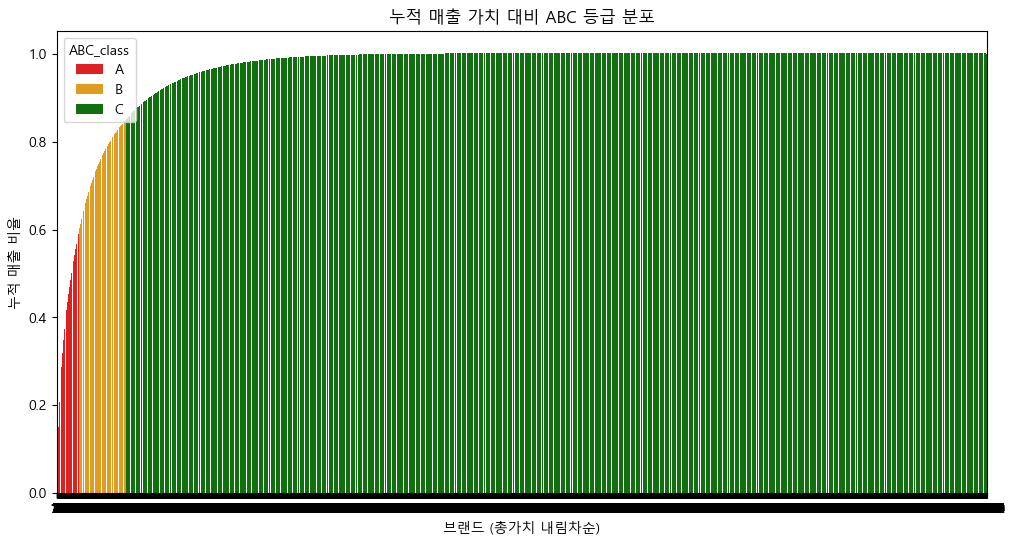

각 ABC 그룹별 총 가치 점유율:
ABC_class
A    0.599785
B    0.250125
C    0.150091
Name: total_value, dtype: float64


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 브랜드별 total_value 기준 정렬 후 누적 비율 계산 (이미 계산된 brand_summary 활용)
brand_summary = brand_summary.sort_values(by='total_value', ascending=False).reset_index(drop=True)
brand_summary['cum_ratio'] = brand_summary['total_value'].cumsum() / brand_summary['total_value'].sum()

# 2. ABC_class 기준 색상 지정
abc_colors = {'A':'red', 'B':'orange', 'C':'green'}

# 3. 시각화
plt.figure(figsize=(12,6))
sns.barplot(
    x=brand_summary.index,
    y=brand_summary['cum_ratio'],
    hue=brand_summary['ABC_class'],
    dodge=False,
    palette=abc_colors
)

plt.title("누적 매출 가치 대비 ABC 등급 분포")
plt.xlabel("브랜드 (총가치 내림차순)")
plt.ylabel("누적 매출 비율")
plt.legend(title="ABC_class")
plt.show()

# 4. 각 그룹별 가치 점유율 계산
group_value = brand_summary.groupby('ABC_class')['total_value'].sum()
group_ratio = group_value / group_value.sum()
print("각 ABC 그룹별 총 가치 점유율:")
print(group_ratio)
